# Look at calculated NMF and HMM models

In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
from h5glance import H5Glance
import yaml



In [ ]:
# set up paths from config
specufex_path = "../specufex/H5files/"
with open("..specufex/config.yaml", "r") as yamlfile:
    config = yaml.load(yamlfile, Loader=yaml.FullLoader)

waveforms_file = "data_" + config["paths/h5name"]
waveform_path = os.path.join("../specufex/H5files", waveforms_file)
sta = config["dataParams/station"]
ch = sta = config["dataParams/channel"]

specufex_results_file = "SpecUFEx_" + config["paths/h5name"]
specufex_path = os.path.join(specufex_path,specufex_results_filename)

In [2]:
# Load waveforms

with h5py.File(waveform_path) as f:

    ev_IDs = sorted([int(x) for x in f[f"waveforms/{sta}/{ch}"].keys()])
    waveforms = []

    for evid in ev_IDs:
        waveforms.append(f[f"waveforms/{sta}/{ch}"][str(evid)][()])

waves = pd.DataFrame(
    index=ev_IDs,
    data={
        "waveform":waveforms
    }
)

In [3]:


with h5py.File(specufex_path) as f:
    EA = f["model_parameters/EA"][()]
    EW = f["model_parameters/EW"][()]
    ElnWA = f["model_parameters/ElnWA"][()]

    ev_IDs = sorted([int(x) for x in f["ACM"].keys()])
    acms = []
    spectrograms = []

    for evid in ev_IDs:
        acms.append(f["ACM"][str(evid)][()])
        spectrograms.append(f["spectrograms/raw_spectrograms"][str(evid)][()])

results = pd.DataFrame(
    index=ev_IDs,
    data={
        "acm":acms,
        "spectrogram":spectrograms
    }
)

results = pd.merge(waves, results, left_index=True, right_index=True)

Text(0.5, 1.0, 'ElnWA')

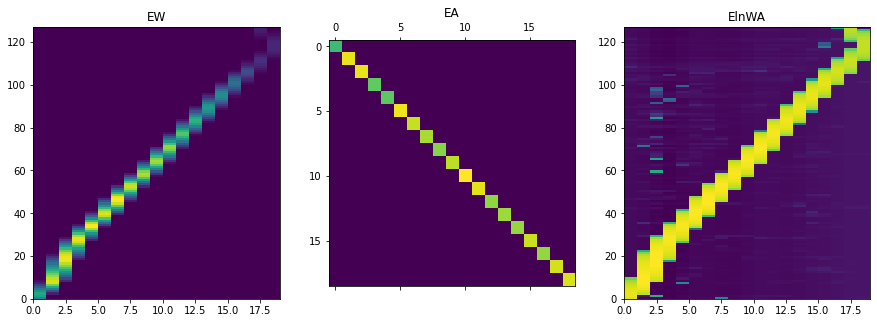

In [4]:
f, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].pcolormesh(EW)
ax[0].set_title("EW")
ax[1].matshow(np.diag(EA[0]))
ax[1].set_title("EA")
ax[2].pcolormesh(ElnWA)
ax[2].set_title("ElnWA")
plt.suptitle("NMF Matrices")
plt.show()

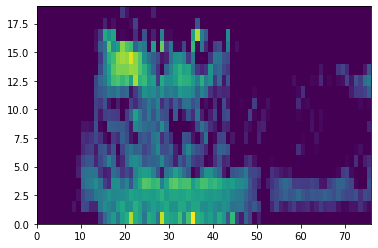

In [5]:
plt.pcolormesh(results.iloc[10]["acm"])
plt.title("Sample ACM")
plt.show()

In [6]:
with h5py.File(specufex_path) as f:
    EB = f["model_parameters/EB"][()]

    ev_IDs = sorted([int(x) for x in f["STM"].keys()])
    stms = []
    fingerprints = []

    for evid in ev_IDs:
        stms.append(f["STM"][str(evid)][()])
        fingerprints.append(f["fingerprints"][str(evid)][()])

results2 = pd.DataFrame(
        index=ev_IDs,
        data={
            "stm":stms,
            "fingerprint":fingerprints
        }
)

results = pd.merge(results, results2, left_index=True, right_index=True)


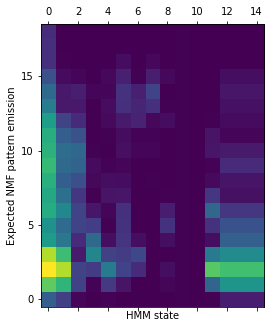

In [7]:
plt.matshow(EB.T)
plt.xlabel("HMM state")
plt.ylabel("Expected NMF pattern emission")
plt.gca().invert_yaxis()
plt.title("EB matrix")
plt.show()

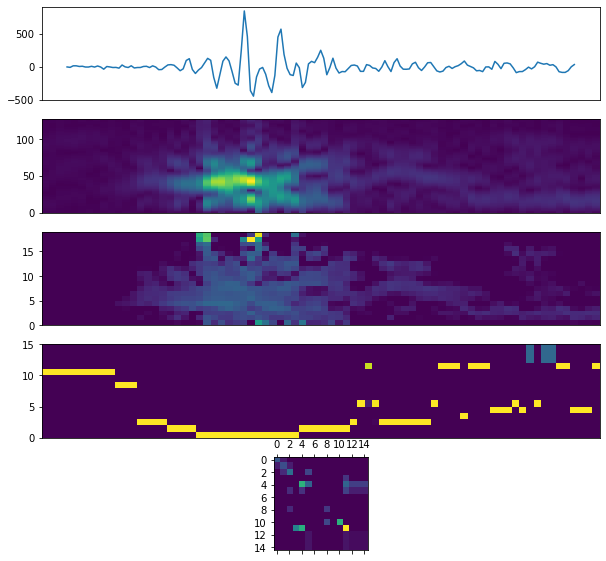

In [10]:
i = 0

f, ax = plt.subplots(5, 1, figsize=(10,10))

#waveform
ax[0].plot(results.iloc[i]["waveform"])
ax[0].set_xticks([])
ax[0].set_ylabel("Waveform")
ax[1].pcolormesh(results.iloc[i]["spectrogram"])
ax[1].set_xticks([])
ax[1].set_ylabel("Spectrogram")
ax[2].pcolormesh(results.iloc[i]["acm"])
ax[2].set_xticks([])
ax[2].set_ylabel("ACM")
ax[3].pcolormesh(results.iloc[i]["stm"])
ax[3].set_xticks([])
ax[3].set_ylabel("State matrix")
ax[4].matshow(results.iloc[i]["fingerprint"])
ax[4].set_xlabel("fingerprint")
plt.title(f"ev_ID: {results.iloc[i]}")
#plt.subplots_adjust(hspace=0)